NLP_df_labeled 
ggl sheet: NLP_df_unlimit_final_more_for_upload     


In [7]:
'''! pip install pandas
! pip install keras
! pip install pythainlp
! pip install scikit-learn
! pip install numpy
! pip install matplotlib
! pip install seaborn'''


'! pip install pandas\n! pip install keras\n! pip install pythainlp'

In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import load_model
from pythainlp.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix
from pythainlp.corpus import thai_stopwords

In [9]:
def stopwords_rm(text):
    stopwords = set(thai_stopwords())
    stopwords.update(["nan", "-", "_", "", " ", "฿" ,"ค่ะ", "ครับ", "จ้า"])  # Add more stopwords as needed

    # Remove stopwords from the text
    cleaned_text = ' '.join(word for word in text.split() if word not in stopwords)
    return cleaned_text

def alone(df):
    print('Are you alone?')
    i = 0 #row number
    df['cleaned1'] = ''
    for row in df['cleaned']:
        words = row.split() #j is array of string
        cleaned = [word for word in words if len(word) > 1]
        cleaned_string = " ".join(cleaned)
        df['cleaned1'].iloc[i] = cleaned_string
        i += 1
    print('done cleaning alone')
    return df['cleaned1']

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [77]:
df_all = pd.read_csv("./df_y4s2_final_new.csv")
df_c = pd.read_csv("./Natt48_org.csv")

df_all['Chadchad'] = 'no'
df_c1 = pd.concat([df_all,df_c])
label_mapping = {'สนง.โยธา': 'โยธา', 'สนง.เทศกิจ': 'เทศกิจ', 'สนง.ตำรวจแห่งชาติ': 'ตำรวจแห่งชาติ'}
#label_mapping = {'สนง.โยธา': 'department of public work', 'สนง.เทศกิจ': 'municipal office', 'สนง.ตำรวจแห่งชาติ': 'police department'}
df_c1['org_step_1'] = df_c1['org_step_1'].map(label_mapping)

In [86]:
print('first', df_all['org_step_1'].value_counts())
print('add chadchad', df_c1['org_step_1'].value_counts())

first org_step_1
สนง.โยธา             119
สนง.เทศกิจ            91
สนง.ตำรวจแห่งชาติ     61
Name: count, dtype: int64
add chadchad org_step_1
โยธา             119
เทศกิจ           105
ตำรวจแห่งชาติ    104
Name: count, dtype: int64


## Balancing data

In [82]:
import time
np.random.seed(int(time.time()))
muni = df_c1[df_c1['org_step_1']=='เทศกิจ'] 
work = df_c1[df_c1['org_step_1']=='โยธา']
police = df_c1[df_c1['org_step_1']=='ตำรวจแห่งชาติ']

df_keep1 = muni.sample(n=104, random_state=42) 
df_keep2 = work.sample(n=104, random_state=42) 

In [83]:
pd_bal = pd.concat([df_keep1, df_keep2, police])

In [84]:
pd_bal['org_step_1'].value_counts()

org_step_1
เทศกิจ           104
โยธา             104
ตำรวจแห่งชาติ    104
Name: count, dtype: int64

In [87]:
df_a = pd_bal
                
df_a['split_text'] = df_a.apply(lambda row: word_tokenize(row['tweet_text'],engine="newmm",keep_whitespace=False), axis=1) #use this
df_a['combined'] = [' '.join(lst) for lst in df_a['split_text']]
df_a['cleaned'] = df_a['combined'].apply(deEmojify)
df_a['cleaned'] = df_a['cleaned'].apply(stopwords_rm) 
df_a['cleaned'] = alone(df_a)
df_a['split_cleaned'] = df_a.apply(lambda row: word_tokenize(row['cleaned'],engine="newmm",keep_whitespace=False), axis=1)


#newmm cuts better than nemm-safe ศร, ีฯ ค่,ะ #attacut is virus
#try other engine or break larger, add space in between  
#df_a['split_text2'] = df_a.apply(lambda row: word_tokenize(row['tweet_text'],engine="newmm-safe",keep_whitespace=False), axis=1)'''

Are you alone?
done cleaning alone


C:\Users\natkn\AppData\Local\Temp\ipykernel_13244\2262645983.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned1'].iloc[i] = cleaned_string
C:\Users\natkn\AppData\Local\Temp\ipykernel_13244\2262645983.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned1'].iloc[i] = cleaned_string
C:\Users\natkn\AppData\Local\Temp\ipykernel_13244\2262645983.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned1'].il

https://pythainlp.github.io/dev-docs/api/tokenize.html

In [88]:
df_a

,index,username,tweet_id,tweet_text,translated_text,org_step_1,org_step_2,relevant,category,query,...,link,mentioned_location,location,image,Chadchad,split_text,combined,cleaned,cleaned1,split_cleaned
122,50,Lookpat_twt,1.723760e+18,เคยลองเดินจากตลาดห้วยขวางกลับหอ ทางเท้ามีแต่แผ...,Have you ever tried walking from Huai Khwang M...,เทศกิจ,สนง.เทศกิจ,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ห้ว...",...,https://twitter.com/Lookpat_twt/status/1723759...,ห้วยขวาง,NaN,[],no,"[เคย, ลอง, เดิน, จาก, ตลาด, ห้วยขวาง, กลับ, หอ...",เคย ลอง เดิน จาก ตลาด ห้วยขวาง กลับ หอ ทางเท้า...,ลอง เดิน ตลาด ห้วยขวาง หอ ทางเท้า แผงลอย คลอง ...,ลอง เดิน ตลาด ห้วยขวาง หอ ทางเท้า แผงลอย คลอง ...,"[ลอง, เดิน, ตลาด, ห้วยขวาง, หอ, ทางเท้า, แผงลอ..."
3199,2951,ShiroHamter,1.650000e+18,บรรทัดทองเริ่มไม่น่าเดินละอะ ร้านค้าเยอะ คนเยอ...,Banthat Thong is starting to become not worth ...,เทศกิจ,สนง.เทศกิจ,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""นคร...",...,https://twitter.com/ShiroHamter/status/1650089...,บรรทัดทอง,NaN,[],no,"[บรรทัด, ทอง, เริ่ม, ไม่, น่า, เดิน, ละ, อะ, ร...",บรรทัด ทอง เริ่ม ไม่ น่า เดิน ละ อะ ร้านค้า เย...,บรรทัด ทอง เดิน อะ ร้านค้า คน ปัญหา ปัญหา ร้าน...,บรรทัด ทอง เดิน อะ ร้านค้า คน ปัญหา ปัญหา ร้าน...,"[บรรทัด, ทอง, เดิน, อะ, ร้านค้า, คน, ปัญหา, ปั..."
3178,2930,mayonsky,1.650000e+18,บรรทัดทองมีแต่ร้านคนนั่งรอริมฟุตบาทเตมไปหมด,Banthat Thong has only shops full of people wa...,เทศกิจ,สนง.เทศกิจ,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""นคร...",...,https://twitter.com/mayonsky/status/1652980315...,บรรทัดทอง,NaN,[],no,"[บรรทัด, ทอง, มี, แต่, ร้าน, คน, นั่ง, รอ, ริม...",บรรทัด ทอง มี แต่ ร้าน คน นั่ง รอ ริม ฟุตบาท เ...,บรรทัด ทอง ร้าน คน นั่ง รอ ริม ฟุตบาท เต,บรรทัด ทอง ร้าน คน นั่ง รอ ริม ฟุตบาท เต,"[บรรทัด, ทอง, ร้าน, คน, นั่ง, รอ, ริม, ฟุตบาท,..."
1875,1618,katkuma,1.700000e+18,จะว่าไปเจ๊แก้วตาเขตปทุมวันไปไหนแล้ว เดี๋ยวนี้ห...,Where did Sister Kaewta go in Pathumwan Distri...,เทศกิจ,สนง.เทศกิจ,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""นคร...",...,https://twitter.com/katkuma/status/16986711500...,ปทุมวัน,NaN,[],no,"[จะ, ว่า, ไป, เจ๊, แก้วตา, เขต, ปทุม, วัน, ไป,...",จะ ว่า ไป เจ๊ แก้วตา เขต ปทุม วัน ไป ไหน แล้ว ...,เจ๊ แก้วตา เขต ปทุม เดี๋ยวนี้ หนัก เดิม มั้ง จ...,เจ๊ แก้วตา เขต ปทุม เดี๋ยวนี้ หนัก เดิม มั้ง จ...,"[เจ๊, แก้วตา, เขต, ปทุม, เดี๋ยวนี้, หนัก, เดิม..."
894,370,DrThapanee,1.750000e+18,ปัญหาเดิม ๆ ปล่อยให้ขายของเกิดปัญหาทางเดินสาธา...,"The same problem, allowing sales to cause prob...",เทศกิจ,สนง.เทศกิจ,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""กรุ...",...,https://twitter.com/DrThapanee/status/17468888...,ประดิพัทธ์,NaN,[],no,"[ปัญหา, เดิม, ๆ, ปล่อย, ให้, ขายของ, เกิด, ปัญ...",ปัญหา เดิม ๆ ปล่อย ให้ ขายของ เกิด ปัญหา ทางเด...,ปัญหา เดิม ปล่อย ขายของ ปัญหา ทางเดิน สาธารณะ ...,ปัญหา เดิม ปล่อย ขายของ ปัญหา ทางเดิน สาธารณะ ...,"[ปัญหา, เดิม, ปล่อย, ขายของ, ปัญหา, ทางเดิน, ส..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,1754,formysekai,1.690000e+18,อยากแจ้งรถทำผิดกฎจราจร แต่รถเป็นทะเบียนต่างประ...,I want to report a car that violates traffic r...,ตำรวจแห่งชาติ,สนง.ตำรวจแห่งชาติ,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""กรุ...",...,https://twitter.com/formysekai/status/16928410...,ห้วยขวาง,NaN,NaN,NaN,"[อยาก, แจ้ง, รถ, ทำผิด, กฎจราจร, แต่, รถ, เป็น...",อยาก แจ้ง รถ ทำผิด กฎจราจร แต่ รถ เป็น ทะเบียน...,แจ้ง รถ ทำผิด กฎจราจร รถ ทะเบียน ต่างประเทศ ทำ...,แจ้ง รถ ทำผิด กฎจราจร รถ ทะเบียน ต่างประเทศ ทำ...,"[แจ้ง, รถ, ทำผิด, กฎจราจร, รถ, ทะเบียน, ต่างปร..."
53,1848,PunkuMiruku,1.690000e+18,วินมอเตอร์ไซค์ตรงวงเวียนบางเขน ฝั่งไปราชภัฏพระ...,Motorcycle taxi at Bang Khen roundabout On the...,ตำรวจแห่งชาติ,สนง.ตำรวจแห่งชาติ,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""พระ...",...,https://twitter.com/PunkuMiruku/status/1688531...,พระนคร,NaN,NaN,NaN,"[วิน, มอเตอร์ไซค์, ตรง, วงเวียน, บาง, เขน, ฝั่...",วิน มอเตอร์ไซค์ ตรง วงเวียน บาง เขน ฝั่ง ไป รา...,วิน มอ

In [90]:
df_a['word_length'] = df_a['split_cleaned'].str.len()

In [91]:
df_a['word_length'].sort_values(ascending=False) 

45      50
1090    50
1887    48
3494    46
51      44
        ..
118      5
571      5
431      5
2524     4
562      4
Name: word_length, Length: 312, dtype: int64

In [93]:
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import SpatialDropout1D

MAX_WORDS = 2000 #memmorized words
MAX_SEQUENCE_LENGTH = 50 #more than 50
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~')
tokenizer.fit_on_texts(df_a.cleaned.values)
word_index = tokenizer.word_index
X = tokenizer.texts_to_sequences(df_a.cleaned.values)

In [102]:
word = 'ตำรวจ'
print(word_index.get('ตำรวจ'))
print(word_index.get('เทศกิจ'))
print(word_index.get('โยธา'))


250
61
824


In [128]:
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
Y = tokenizer.texts_to_sequences(df_a.org_step_1.values)
Y = pd.get_dummies(df_a['org_step_1']).values

#label_mapping = {'ตำรวจแห่งชาติ': word_index.get('ตำรวจ'), 'เทศกิจ': word_index.get('เทศกิจ'), 'โยธา': word_index.get('โยธา') }
#Y = [label_mapping.get(org, 0) for org in df_a['org_step_1']]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)

In [121]:
'''Y_train = np.array(Y_train)
Y_test = np.array(Y_test)'''

## Saving the training inputs

In [129]:
import pickle

# Save X_train, X_test, Y_train, Y_test
with open('./org_data.pkl', 'wb') as f:
    pickle.dump((X_train, X_test, Y_train, Y_test), f)


In [130]:
X_test.shape

(63, 50)

In [131]:
Y_test.shape

(63, 3)

In [132]:
from keras.callbacks import EarlyStopping
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    f1 = 2 * ((precision * recall) / (precision + recall + K.epsilon()))
    return f1
 
model = Sequential()
model.add(Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1)) #0.2   Loss: 1.231  Accuracy: 0.419
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', f1_m])

epochs = 15
batch_size = 32


early_stopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])


Epoch 1/15
8/8 [==============================] - 4s 71ms/step - loss: 1.0958 - accuracy: 0.3815 - f1_m: 0.0000e+00
Epoch 2/15
8/8 [==============================] - 0s 61ms/step - loss: 1.0667 - accuracy: 0.7831 - f1_m: 0.0000e+00
Epoch 3/15
8/8 [==============================] - 0s 50ms/step - loss: 0.9823 - accuracy: 0.7550 - f1_m: 0.0698
Epoch 4/15
8/8 [==============================] - 0s 48ms/step - loss: 0.7807 - accuracy: 0.7470 - f1_m: 0.5840
Epoch 5/15
8/8 [==============================] - 0s 63ms/step - loss: 0.4833 - accuracy: 0.8835 - f1_m: 0.8117
Epoch 6/15
8/8 [==============================] - 1s 63ms/step - loss: 0.3059 - accuracy: 0.9518 - f1_m: 0.9461
Epoch 7/15
8/8 [==============================] - 0s 62ms/step - loss: 0.1919 - accuracy: 0.9759 - f1_m: 0.9736
Epoch 8/15
8/8 [==============================] - 0s 55ms/step - loss: 0.1286 - accuracy: 0.9799 - f1_m: 0.9732
Epoch 9/15
8/8 [==============================] - 0s 58ms/step - loss: 0.0850 - accuracy: 0.9839

2/2 [==============================] - 0s 13ms/step - loss: 0.4575 - accuracy: 0.8254 - f1_m: 0.8426
Test set
  Loss: 0.458
  Accuracy: 0.825
2/2 [==============================] - 0s 9ms/step


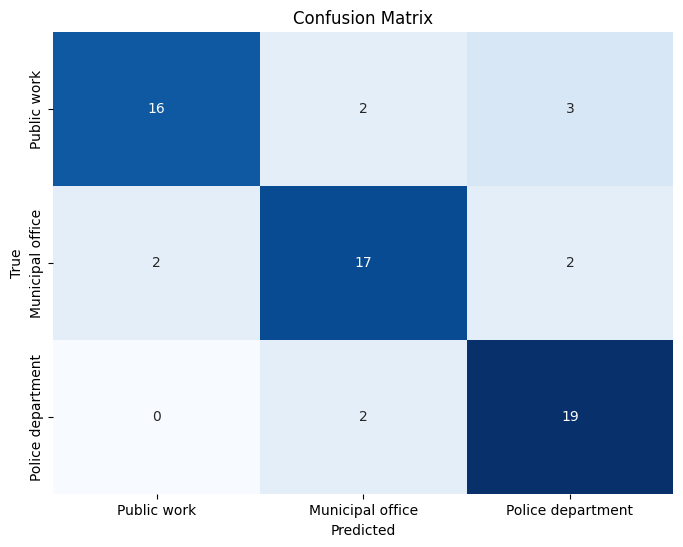

In [142]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

accr = model.evaluate(X_test, Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0], accr[1]))

# Get predictions for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

#Calculate the confusion matrix
conf_matrix = confusion_matrix(np.argmax(Y_test, axis=1), y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Public work', 'Municipal office', 'Police department'], 
            yticklabels=['Public work', 'Municipal office', 'Police department'],
            cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
#plt.savefig('./img/confusion_org_noHyper.png')
plt.show()



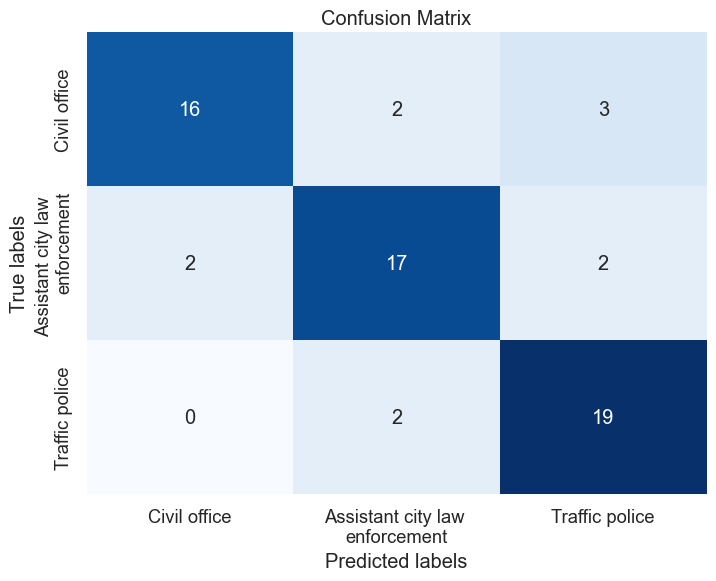

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix values
conf_matrix = np.array([[16, 2, 3],
                        [2, 17, 2],
                        [0, 2, 19]])

# Labels for classes
labels = ["Civil office", "Assistant city law \nenforcement", "Traffic police"]

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
#plt.savefig('./img/confusion_org_noHyper_formatted.png')
plt.show()


## Save the Model


In [143]:
# Save the best model
model.save('./model/org_arch_nothyper.h5')

model_json = model.to_json()
with open("./model/org_arch_nothyper.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights('./model/org_weight_nothyper.h5')

c:\Users\natkn\anaconda3\envs\gpt-twitter\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [94]:
#! pip install gensim
#! pip install pythainlp
from pythainlp.word_vector import WordVector

wv = WordVector()
sentence = 'อ้วน ร้าวราน'
a = wv.sentence_vectorizer(sentence, use_mean=True)
print(a.shape) #(1, 300)

(1, 300)


In [52]:
model_json = model.to_json()
with open("org_model_architecture.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights('org_model_weights.h5')

Using

In [42]:
X_test=['อย่า ลืม ติดตาม ชม รายการ พิเศษ','ด่วน ลด แบบ จัดเต็ม ของแถม มากมาย']
X_test=tokenizer.texts_to_sequences(X_test)
X_test=pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)
model.predict(X_test)

1/1 [==============================] - 0s 68ms/step


array([[0.03899263, 0.03360739, 0.92739993],
       [0.01167417, 0.0186958 , 0.96963006]], dtype=float32)

End.................................................

In [53]:
Y # public work (โยธา), municipal office (เทศกิจ) ,police department

array([[ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [False, False,  True],
       [Fa

In [44]:
df_a.cleaned.values[1]

'เดิน เซ นท รัล ลาดพร้าว พหลโยธิน 34 ไหว พัง อากาศ กทม เดิน หนัก มอ ไซ ขับ ฟุต บาต เเล้ว เ เร ง เหมือน เกะกะ ทางเดิน อันนี้ แก้'

In [45]:
X.shape #after padding sentence, input

(101, 63)

In [46]:
X #after padding

array([[   0,    0,    0, ...,  156,  113,  114],
       [   0,    0,    0, ...,    4,  115,  159],
       [   0,    0,    0, ...,   88,  417,  418],
       ...,
       [   0,    0,    0, ...,  316,    3, 1040],
       [   0,    0,    0, ...,   55,   51,    2],
       [   0,    0,    0, ..., 1061, 1062,   80]])

In [47]:
X[76] #before padding

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 889, 313,  14,  14, 890, 382,  64, 155, 891,   3, 892, 893,
       208, 894,  41, 895, 130, 896,   1, 216, 355, 897, 294])

In [48]:
tokenizer.word_index

{'เดิน': 1,
 'ฟุตบาท': 2,
 'ทางเท้า': 3,
 'ทางเดิน': 4,
 'ถนน': 5,
 'คน': 6,
 'ร้าน': 7,
 'จอด': 8,
 'รถ': 9,
 'ต้น': 10,
 'บริเวณ': 11,
 'เขต': 12,
 'ทำ': 13,
 'ซอย': 14,
 '1': 15,
 'ม': 16,
 'น้ำ': 17,
 'ทอง': 18,
 'ประตู': 19,
 'งาม': 20,
 'วงศ์วาน': 21,
 'มนุษย์': 22,
 'สังคม': 23,
 'idku': 24,
 'ku': 25,
 'manso': 26,
 'สร้างสรรค์': 27,
 'บรรทัด': 28,
 'เส้น': 29,
 'แถว': 30,
 'ขาย': 31,
 'ชุมชน': 32,
 'แยก': 33,
 'การเปลี่ยนแปลง': 34,
 'kasetsart': 35,
 'เกษตร': 36,
 'โซ': 37,
 'manandsociety': 38,
 '2566': 39,
 'ฝั่ง': 40,
 'ขายของ': 41,
 'แมน': 42,
 'มอ': 43,
 'ไซ': 44,
 'เหมือน': 45,
 'พื้น': 46,
 '2': 47,
 'แจ้ง': 48,
 'ดู': 49,
 'อ่ะ': 50,
 'วาง': 51,
 'อโศก': 52,
 'หลุม': 53,
 '01999141': 54,
 'หลบ': 55,
 'ฝนตก': 56,
 'สะพาน': 57,
 'พัง': 58,
 'สภาพ': 59,
 'เจอ': 60,
 'ติด': 61,
 'ต้นไม้': 62,
 'แคบ': 63,
 'หน้า': 64,
 'หลัก': 65,
 'คลอง': 66,
 'ลาดพร้าว': 67,
 'กทม': 68,
 'ห้วยขวาง': 69,
 'ท่อ': 70,
 'วิ่ง': 71,
 'รู้': 72,
 'เวลา': 73,
 'ชัชชาติ': 74,
 'สายไฟ': 75,
 'ไปมา